# Indicators

## Source

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from talib import EMA, SMA, MACD, ADX, RSI, WILLR, ATR, BBANDS

In [2]:
btc_yahoo = pd.read_csv('/home/giujorge/datalake/lab/Crypto/crypto/data/external/yahoo/daily/usd/BTC-USD.csv', parse_dates=True, index_col=0)
btc_yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [18]:
btc_array = btc_yahoo.to_numpy()

##  Trend

### SMA

#### SMA 100 : Big Pirce Dip

In [21]:
btc_yahoo['SMA100'] = SMA(btc_yahoo['Adj Close'], timeperiod = 100)

#### SMA 200 : Last Stand in an uptrand or downtrent

In [22]:
btc_yahoo['SMA200'] = SMA(btc_yahoo['Adj Close'], timeperiod = 200)

#### VIZ

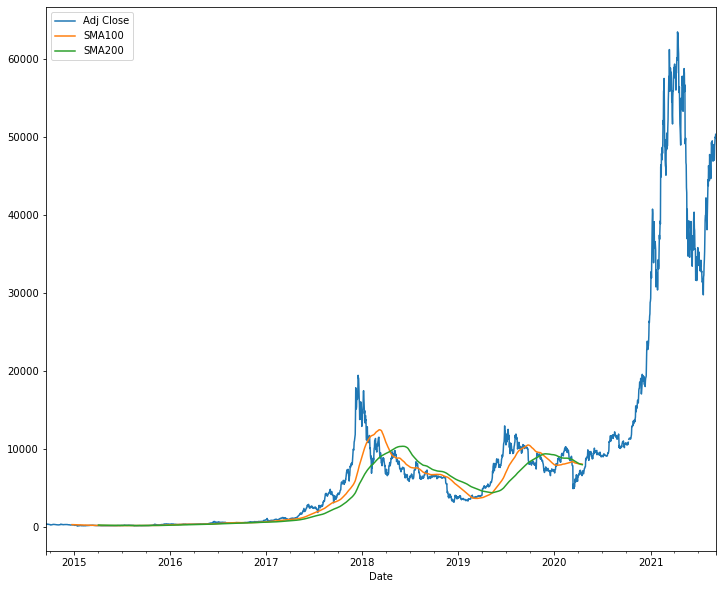

In [28]:
btc_yahoo[['Adj Close','SMA100','SMA200']].plot(figsize=(12,10))
plt.show()

### EMA

#### EMA 5 : Momentum

In [6]:
btc_yahoo['EMA5'] = EMA(btc_yahoo['Adj Close'], timeperiod = 5)

In [10]:
btc_yahoo[btc_yahoo['EMA5'] > 0]

,Open,High,Low,Close,Adj Close,Volume,EMA5
Date,,,,,,,
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,416.859003
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07,411.956671
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,4.509950e+07,419.901442
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,3.062770e+07,421.002624
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,2.681440e+07,417.859751
...,...,...,...,...,...,...,...
2020-04-12,6858.067871,7119.947266,6811.078125,6971.091797,6971.091797,3.575957e+10,6990.855907
2020-04-13,6965.616699,6965.616699,6668.259766,6845.037598,6845.037598,3.861931e+10,6942.249804
2020-04-14,6843.281738,6958.557129,6793.821289,6842.427734,6842.427734,3.411043e+10,6908.975780


#### EMA 10 : Short term trend

In [11]:
btc_yahoo['EMA10'] = EMA(btc_yahoo['Adj Close'], timeperiod = 10)

#### EMA 20 : reversion to the mean

In [12]:
btc_yahoo['EMA20'] = EMA(btc_yahoo['Adj Close'], timeperiod = 20)

#### EMA 30 : Swing filter

In [13]:
btc_yahoo['EMA30'] = EMA(btc_yahoo['Adj Close'], timeperiod = 30)

#### EMA 50 : Pullback in uptrend

In [14]:
btc_yahoo['EMA50'] = EMA(btc_yahoo['Adj Close'], timeperiod = 50)

### ViZ

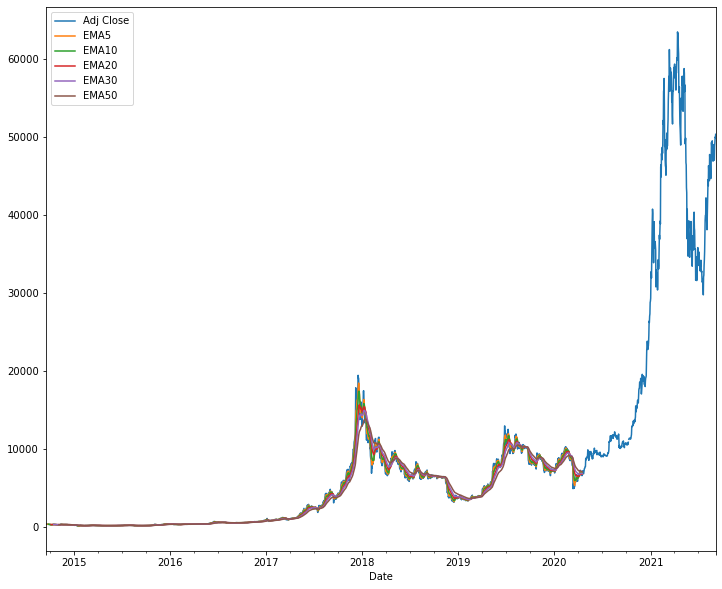

In [34]:
btc_yahoo[['Adj Close','EMA5','EMA10','EMA20','EMA30','EMA50']].plot(figsize=(12,10))
plt.show()

## Momentum Indicators

###  Moving Average Convergence/Divergence : Price swings

In [45]:
MACD(btc_yahoo['Adj Close'], 26, 12,9)

(Date
 2014-09-17   NaN
 2014-09-18   NaN
 2014-09-19   NaN
 2014-09-20   NaN
 2014-09-21   NaN
               ..
 2021-09-01   NaN
 2021-09-02   NaN
 2021-09-03   NaN
 2021-09-04   NaN
 2021-09-05   NaN
 Length: 2546, dtype: float64,
 Date
 2014-09-17   NaN
 2014-09-18   NaN
 2014-09-19   NaN
 2014-09-20   NaN
 2014-09-21   NaN
               ..
 2021-09-01   NaN
 2021-09-02   NaN
 2021-09-03   NaN
 2021-09-04   NaN
 2021-09-05   NaN
 Length: 2546, dtype: float64,
 Date
 2014-09-17   NaN
 2014-09-18   NaN
 2014-09-19   NaN
 2014-09-20   NaN
 2014-09-21   NaN
               ..
 2021-09-01   NaN
 2021-09-02   NaN
 2021-09-03   NaN
 2021-09-04   NaN
 2021-09-05   NaN
 Length: 2546, dtype: float64)

###  Average Directional Movement Index

In [49]:
ADX(btc_yahoo['High'],btc_yahoo['Low'], btc_yahoo['Adj Close'], 14)

Date
2014-09-17   NaN
2014-09-18   NaN
2014-09-19   NaN
2014-09-20   NaN
2014-09-21   NaN
              ..
2021-09-01   NaN
2021-09-02   NaN
2021-09-03   NaN
2021-09-04   NaN
2021-09-05   NaN
Length: 2546, dtype: float64

### Relative Strength Index

In [50]:
RSI(btc_yahoo['Adj Close'], 14)

Date
2014-09-17   NaN
2014-09-18   NaN
2014-09-19   NaN
2014-09-20   NaN
2014-09-21   NaN
              ..
2021-09-01   NaN
2021-09-02   NaN
2021-09-03   NaN
2021-09-04   NaN
2021-09-05   NaN
Length: 2546, dtype: float64

### Williams' %R

In [55]:
WILLR(btc_yahoo['High'],btc_yahoo['Low'], btc_yahoo['Adj Close'],14)

Date
2014-09-17          NaN
2014-09-18          NaN
2014-09-19          NaN
2014-09-20          NaN
2014-09-21          NaN
                ...    
2021-09-01   -25.217626
2021-09-02   -28.239061
2021-09-03   -20.856584
2021-09-04   -22.616613
2021-09-05   -13.111161
Length: 2546, dtype: float64

## Volume Indicators

?

## Cycle Indicators

?

## Volatility Indicators

### Average True Range

In [58]:
ATR(btc_yahoo['High'],btc_yahoo['Low'], btc_yahoo['Adj Close'],14)

Date
2014-09-17   NaN
2014-09-18   NaN
2014-09-19   NaN
2014-09-20   NaN
2014-09-21   NaN
              ..
2021-09-01   NaN
2021-09-02   NaN
2021-09-03   NaN
2021-09-04   NaN
2021-09-05   NaN
Length: 2546, dtype: float64

### Keltner Channel (KC)

?

### Bollinger Bands

In [65]:
BBANDS(btc_yahoo['Adj Close'], 2)

(Date
 2014-09-17           NaN
 2014-09-18    473.781022
 2014-09-19    439.262008
 2014-09-20    415.957993
 2014-09-21    413.945481
                  ...    
 2021-09-01           NaN
 2021-09-02           NaN
 2021-09-03           NaN
 2021-09-04           NaN
 2021-09-05           NaN
 Length: 2546, dtype: float64,
 Date
 2014-09-17           NaN
 2014-09-18    440.887008
 2014-09-19    409.617996
 2014-09-20    401.849991
 2014-09-21    403.862503
                  ...    
 2021-09-01           NaN
 2021-09-02           NaN
 2021-09-03           NaN
 2021-09-04           NaN
 2021-09-05           NaN
 Length: 2546, dtype: float64,
 Date
 2014-09-17           NaN
 2014-09-18    407.992995
 2014-09-19    379.973984
 2014-09-20    387.741989
 2014-09-21    393.779525
                  ...    
 2021-09-01           NaN
 2021-09-02           NaN
 2021-09-03           NaN
 2021-09-04           NaN
 2021-09-05           NaN
 Length: 2546, dtype: float64)